---

<h1><center>Principal Components Analysis </center></h1>

---

In this problem we will use principal components analysis to reduce the number of columns in a data matrix. 

In [1]:
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle

The data consists of N=100 samples of a D=16-dimensional random variable. The samples are iid. Our task is to find a linear combination of the variables that captures most of the variance of the distribution. The next cell loads the data and extracts its dimensions. 

In [2]:
with open('PCA.pickle','rb') as file:
    X = pickle.load(file)
    
N = X.shape[0]
D = X.shape[1]

# Sample covariance matrix
`np.corrcoef` computes the sample correlation matrix for a matrix. Use it to compute the 16x16 sample correlation matrix for `X`, and then use `plt.imshow` to visualize the upper-left 4x4 corner. 

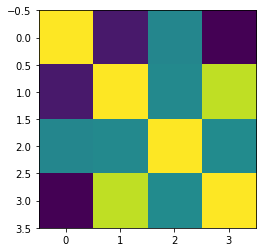

In [4]:
cov = np.corrcoef(X.T) # 16x16

plt.imshow(cov[:4, :4])

plt.show()

# Center and normalize the data
Subtract the mean of each column from `X` and record this new matrix to `Xc`. 

In [5]:
Xc = X - np.mean(X, axis = 0)

# Run SVD on Xc

In [6]:
U, s, Vt = np.linalg.svd(Xc)

# Plot the singular values in order 

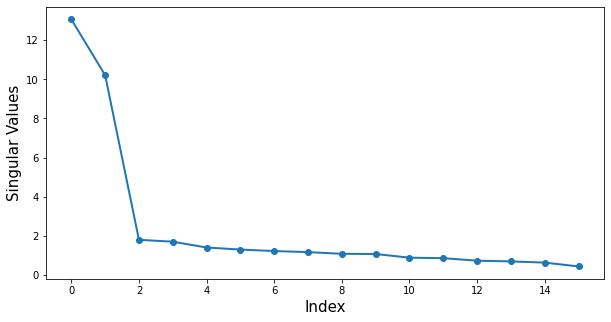

In [7]:
fig3 = plt.figure(figsize=(10,5))

plt.plot(s, '-o', linewidth = 2)

plt.xlabel('Index', fontsize = 15)
plt.ylabel('Singular Values', fontsize = 15)

plt.show()

# Plot the total variantion explained as a function of the number of dimensions.
The total variation explained by the rank `r` approximation of `Xc` is the sum of the first `r` singular values. 

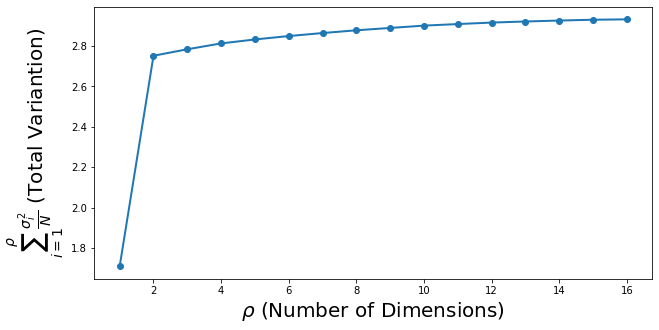

In [8]:
fig4 = plt.figure(figsize=(10,5))

rho = np.arange(s.shape[0]) + 1

plt.plot(rho, np.cumsum(s**2) / N , '-o', linewidth = 2)

plt.xlabel(r'${\rho}$ (Number of Dimensions)', fontsize = 20)
plt.ylabel(r'$\sum_{i=1}^\rho\frac{\sigma_i^2}{N}$ (Total Variantion)', fontsize = 20)

plt.show()

# 5. Compute Ur, sr, and Vhr for r=2.
Save these to `Ur`, `sr`, and `Vhr`

In [9]:
r = 2
Ur = U[:, :r]
sr = s[:r]
Vtr = Vt[:r, :]

# Compute the optimal two-column representation of X
Save it to Xr

In [10]:
Xr = Ur @ np.diag(sr)